In [36]:
# https://docs.google.com/document/d/1k0D6V18gg0o2-3kp7Xo-AU-UyyH1CFS9MbNUOOFX3qg/edit#heading=h.k29ki1on07lm

# Descritiva
# De onde vêm as carnes distribuídas na rede varejista do RN?
# Hipóteses e variáveis 
# Hipótese  1  - Varejistas de maior porte vendem carnes que vêm de mais longe
# VI - Porte do varejista, porte_loja
# VD - Distância da origem, distancia_km (todos)
# Covariável - Renda setor censitário, renda_setor 

# Hipótese 2  - Varejista de maior porte maior a qualidade sanitária 
# VI - Porte do varejista, porte_loja
# VD - Performance sanitária, desc_desempenho_sanitario (apenas boi) 
# Covariável - Renda setor censitário, renda_setor 

# Hipótese 3 - varejista de maior porte mais alimentos ultraprocessados
# VI - Porte do varejista, porte_loja
# VD - Nível de processamento, processamento
# Covariável - Renda setor censitário, renda_setor 
# Detalhamento das variáveis


In [37]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [38]:
df = pd.read_csv('entrada/20240615_carnestotais_att.csv')
df

,ID,nome_da_loja,endereco_da_loja,loja_municipio,lng_loja,lat_loja,carne,nivel_de_inspecao,num_de_inspecao,nome_do_frigo,frigo_tipo,uf_frigo,lng_frigo,lat_frigo,est_desempenho_sanitario,desc_desempenho_sanitario,distancia_km,cod_setor,renda_setor,porte_loja,processamento
0,frango747,3667,"RUA GENERINA VALE,809, CENTRO - Rua Joel Damas...",Caico,"-35,202074","-5,836721",Frango,SIF,3667,GUARAVES GUARABIRA AVES,AA1 - AVES - MAIS DE 3000/H|ABATEDOURO FRIGORI...,PB,"-35,48996498","-6,852715",NaN,NaN,"116,784358",2.408102e+14,"4029,68",Supermercado,ultraprocessado
1,boi1006,Açougue Pai e Filho,"R. São Sebastião, Macaíba - RN, 59280-000",Macaiba,"-35,34827079","-5,850981514",Carne bovina,SEIPOA,0165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Conveniência,ultraprocessado
2,boi865,Açougue Pai e Filho,"R. São Sebastião, Macaíba - RN, 59280-000",Macaiba,"-35,34895744","-5,852689182",Carne bovina,SIF,76,JBS,UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...,SP,"-48,56737784","-20,55845552",4.0,"Frigorífico habilitado para a exportação, com ...","2164,837028",2.407104e+14,"628,31",Conveniência,ultraprocessado
3,boi866,Açougue Pai e Filho,"R. São Sebastião, Macaíba - RN, 59280-000",Macaiba,"-3,534930076","-5,851664581",Carne bovina,SIF,3921,NUTRIZA AGROINDUSTRIAL DE ALIMENTOS,ABATEDOURO FRIGORIFICO - C15,GO,"-48,28029255","-17,30058111",4.0,"Frigorífico habilitado para a exportação, com ...","5027,953642",NaN,NaN,Conveniência,ultraprocessado
4,frango987,Açougue Pai e Filho,"R. São Sebastião, Macaíba - RN, 59280-000",Macaiba,"-35,34827079","-5,850981514",Frango,SEIPOA,0042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Conveniência,ultraprocessado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,frango956,Tela Quente,"São Gonçalo do Amarante - Rio Grande do Norte,...",sao goncalo,"-35,27215547","-5,77344728",Frango,SIF,121,BRF,AA1 - AVES - MAIS DE 3000/H|ABATEDOURO FRIGORI...,MG,"-48,27795018","-18,91899861",NaN,NaN,"2026,188151",2.412005e+14,"810,81",Sortimento limitado,NaN
2332,porco310,Tela Quente,"São Gonçalo do Amarante - Rio Grande do Norte,...",sao goncalo,"-35,27215547","-5,77344728",suina,SIF,3515,BRF,AA4 - AVES - ATE 600/H|ABATEDOURO FRIGORIFICO ...,MT,"-55,92177071","-13,07046495",NaN,NaN,"2405,35565",2.412005e+14,"810,81",Sortimento limitado,NaN
2333,porco311,Tela Quente,"São Gonçalo do Amarante - Rio Grande do Norte,...",sao goncalo,"-35,27215547","-5,77344728",suina,SIF,77,SEARA ALIMENTOS,PC1 - PRODUTOS CARNEOS - MAIS DE 5.000 T/D|UNI...,RS,"-51,94384677","-29,60742262",NaN,NaN,"3166,544261",2.412005e+14,"810,81",Sortimento limitado,NaN
2334,porco316,Tela Quente,"São Gonçalo do Amarante - Rio Grande do Norte,...",sao goncalo,"-35,27215547","-5,77344728",suina,SIE,166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sortimento limitado,NaN


In [39]:
float_cols = ['lng_loja', 'lat_loja', 'lng_frigo', 'lat_frigo', 'distancia_km', 'renda_setor']
for col in float_cols:
    df[col] = df[col].str.replace(',', '.').astype(float)
    

In [40]:
df.columns = [i.strip() for i in df.columns]
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip()

In [41]:
df.dropna(subset=['lng_frigo'], inplace=True)
df.shape

(2197, 21)

In [42]:
df

,ID,nome_da_loja,endereco_da_loja,loja_municipio,lng_loja,lat_loja,carne,nivel_de_inspecao,num_de_inspecao,nome_do_frigo,frigo_tipo,uf_frigo,lng_frigo,lat_frigo,est_desempenho_sanitario,desc_desempenho_sanitario,distancia_km,cod_setor,renda_setor,porte_loja,processamento
0,frango747,3667,"RUA GENERINA VALE,809, CENTRO - Rua Joel Damas...",Caico,-35.202074,-5.836721,Frango,SIF,3667,GUARAVES GUARABIRA AVES,AA1 - AVES - MAIS DE 3000/H|ABATEDOURO FRIGORI...,PB,-35.489965,-6.852715,NaN,NaN,116.784358,2.408102e+14,4029.68,Supermercado,ultraprocessado
2,boi865,Açougue Pai e Filho,"R. São Sebastião, Macaíba - RN, 59280-000",Macaiba,-35.348957,-5.852689,Carne bovina,SIF,76,JBS,UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...,SP,-48.567378,-20.558456,4.0,"Frigorífico habilitado para a exportação, com ...",2164.837028,2.407104e+14,628.31,Conveniência,ultraprocessado
3,boi866,Açougue Pai e Filho,"R. São Sebastião, Macaíba - RN, 59280-000",Macaiba,-3.534930,-5.851665,Carne bovina,SIF,3921,NUTRIZA AGROINDUSTRIAL DE ALIMENTOS,ABATEDOURO FRIGORIFICO - C15,GO,-48.280293,-17.300581,4.0,"Frigorífico habilitado para a exportação, com ...",5027.953642,NaN,NaN,Conveniência,ultraprocessado
5,boi3,Ary Coiffure - Carrefour,"CARREFOUR - AV. SEN. SALGADO FILHO, 3700 - LOJ...",Natal,-35.209900,-5.845500,Carne bovina,SIF,791,MINERVA,"ABATEDOURO FRIGORIFICO - C15, AB1 - BOVINO - M...",RO,-61.805743,-11.725435,5.0,"Frigorífico habilitado para a exportação, com ...",2995.570405,2.408102e+14,2754.04,Hiper/Supercenter,ultraprocessado
6,boi4,Ary Coiffure - Carrefour,"CARREFOUR - AV. SEN. SALGADO FILHO, 3700 - LOJ...",Natal,-35.209900,-5.845500,Carne bovina,SIF,860,MASTERBOI,"ABATEDOURO FRIGORIFICO - C15, AB3 - BOVINO - 4...",TO,-48.424807,-7.633315,4.0,"Frigorífico habilitado para a exportação, com ...",1474.191415,2.408102e+14,2754.04,Hiper/Supercenter,ultraprocessado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,frango954,Tela Quente,"São Gonçalo do Amarante - Rio Grande do Norte,...",sao goncalo,-35.272155,-5.773447,Frango,SIF,716,BRF,AA1 - AVES - MAIS DE 3000/H|ABATEDOURO FRIGORI...,PR,-53.741411,-24.732077,NaN,NaN,2879.481729,2.412005e+14,810.81,Sortimento limitado,NaN
2330,frango955,Tela Quente,"São Gonçalo do Amarante - Rio Grande do Norte,...",sao goncalo,-35.272155,-5.773447,Frango,SIF,3667,GUARAVES GUARABIRA AVES,AA1 - AVES - MAIS DE 3000/H|ABATEDOURO FRIGORI...,PB,-35.489965,-6.852715,NaN,NaN,121.762613,2.412005e+14,810.81,Sortimento limitado,NaN
2331,frango956,Tela Quente,"São Gonçalo do Amarante - Rio Grande do Norte,...",sao goncalo,-35.272155,-5.773447,Frango,SIF,121,BRF,AA1 - AVES - MAIS DE 3000/H|ABATEDOURO FRIGORI...,MG,-48.277950,-18.918999,NaN,NaN,2026.188151,2.412005e+14,810.81,Sortimento limitado,NaN
2332,porco310,Tela Quente,"São Gonçalo do Amarante - Rio Grande do Norte,...",sao goncalo,-35.272155,-5.773447,suina,SIF,3515,BRF,AA4 - AVES - ATE 600/H|ABATEDOURO FRIGORIFICO ...,MT,-55.921771,-13.070465,NaN,NaN,2405.355650,2.412005e+14,810.81,Sortimento limitado,NaN


In [43]:
df.to_csv('saida/20240615_carnestotais_att_nonans.csv', index=False)

# Descritiva
## De onde vêm as carnes distribuídas na rede varejista do RN?

In [44]:
df.uf_frigo.value_counts()

uf_frigo
SC    325
PR    322
SP    219
GO    185
MT    173
MS    153
PA    149
RS    148
MG    147
PE    117
PB     69
TO     63
RJ     26
CE     22
RO     21
BA     20
MA     20
DF     11
ES      3
AC      2
RR      1
SE      1
Name: count, dtype: int64

/var/folders/8q/x5wgt6z57dzgrzrjzp_77yr00000gn/T/ipykernel_42907/1909859947.py:22: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




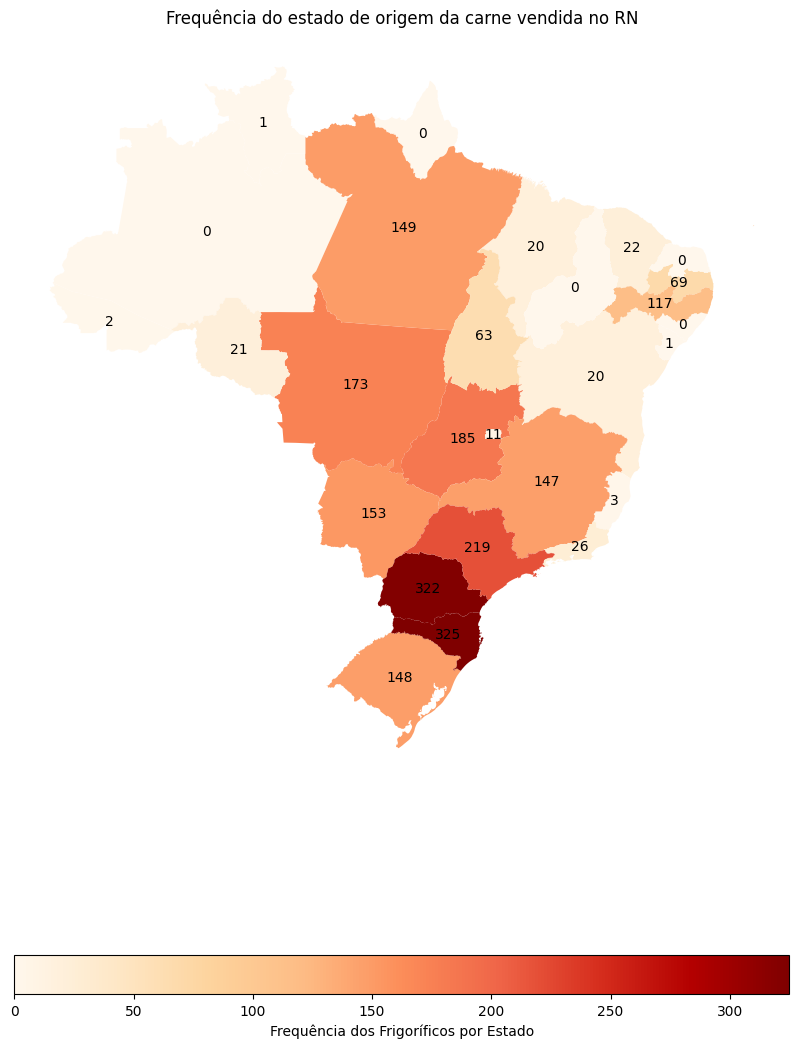

In [45]:
import geopandas as gpd
import matplotlib.pyplot as plt

# URL to the GeoJSON file of Brazilian states
geojson_url = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'

# Load the GeoJSON file
estados = gpd.read_file(geojson_url)

# Map the frequency of states in 'uf_frigo' column to the states GeoDataFrame
estado_frequencia = df['uf_frigo'].value_counts()
estados['freq'] = estados['sigla'].map(estado_frequencia).fillna(0)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 15))
estados.plot(column='freq', ax=ax, legend=True, cmap='OrRd',
             legend_kwds={'label': "Frequência dos Frigoríficos por Estado",
                          'orientation': "horizontal"})
plt.title('Frequência do estado de origem da carne vendida no RN')

# add the number of frigoríficos in each state
for x, y, label in zip(estados.centroid.x, estados.centroid.y, (estados['freq'].astype(int))):
    ax.text(x, y, label, color='black', fontsize=10, ha='center', va='center')
plt.axis('off')
plt.show()

# Hipóteses e variáveis 
## Hipótese  1  - Varejistas de maior porte vendem carnes que vêm de mais longe

- VI - Porte do varejista, porte_loja
- VD - Distância da origem, distancia_km (todos)
- Covariável - Renda setor censitário, renda_setor 

In [46]:
df.reset_index(drop=True, inplace=True)

In [47]:
import plotly.express as px

# Análise Exploratória com Plotly
fig = px.box(df, x='porte_loja', y='distancia_km', 
             title='Distância da Origem das Carnes por Porte do Varejista',
             labels={'porte_loja': 'Porte do Varejista', 'distancia_km': 'Distância da Origem (km)'},
                color='porte_loja')

fig.show()

In [48]:
df

,ID,nome_da_loja,endereco_da_loja,loja_municipio,lng_loja,lat_loja,carne,nivel_de_inspecao,num_de_inspecao,nome_do_frigo,frigo_tipo,uf_frigo,lng_frigo,lat_frigo,est_desempenho_sanitario,desc_desempenho_sanitario,distancia_km,cod_setor,renda_setor,porte_loja,processamento
0,frango747,3667,"RUA GENERINA VALE,809, CENTRO - Rua Joel Damas...",Caico,-35.202074,-5.836721,Frango,SIF,3667,GUARAVES GUARABIRA AVES,AA1 - AVES - MAIS DE 3000/H|ABATEDOURO FRIGORI...,PB,-35.489965,-6.852715,NaN,NaN,116.784358,2.408102e+14,4029.68,Supermercado,ultraprocessado
1,boi865,Açougue Pai e Filho,"R. São Sebastião, Macaíba - RN, 59280-000",Macaiba,-35.348957,-5.852689,Carne bovina,SIF,76,JBS,UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...,SP,-48.567378,-20.558456,4.0,"Frigorífico habilitado para a exportação, com ...",2164.837028,2.407104e+14,628.31,Conveniência,ultraprocessado
2,boi866,Açougue Pai e Filho,"R. São Sebastião, Macaíba - RN, 59280-000",Macaiba,-3.534930,-5.851665,Carne bovina,SIF,3921,NUTRIZA AGROINDUSTRIAL DE ALIMENTOS,ABATEDOURO FRIGORIFICO - C15,GO,-48.280293,-17.300581,4.0,"Frigorífico habilitado para a exportação, com ...",5027.953642,NaN,NaN,Conveniência,ultraprocessado
3,boi3,Ary Coiffure - Carrefour,"CARREFOUR - AV. SEN. SALGADO FILHO, 3700 - LOJ...",Natal,-35.209900,-5.845500,Carne bovina,SIF,791,MINERVA,"ABATEDOURO FRIGORIFICO - C15, AB1 - BOVINO - M...",RO,-61.805743,-11.725435,5.0,"Frigorífico habilitado para a exportação, com ...",2995.570405,2.408102e+14,2754.04,Hiper/Supercenter,ultraprocessado
4,boi4,Ary Coiffure - Carrefour,"CARREFOUR - AV. SEN. SALGADO FILHO, 3700 - LOJ...",Natal,-35.209900,-5.845500,Carne bovina,SIF,860,MASTERBOI,"ABATEDOURO FRIGORIFICO - C15, AB3 - BOVINO - 4...",TO,-48.424807,-7.633315,4.0,"Frigorífico habilitado para a exportação, com ...",1474.191415,2.408102e+14,2754.04,Hiper/Supercenter,ultraprocessado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,frango954,Tela Quente,"São Gonçalo do Amarante - Rio Grande do Norte,...",sao goncalo,-35.272155,-5.773447,Frango,SIF,716,BRF,AA1 - AVES - MAIS DE 3000/H|ABATEDOURO FRIGORI...,PR,-53.741411,-24.732077,NaN,NaN,2879.481729,2.412005e+14,810.81,Sortimento limitado,NaN
2193,frango955,Tela Quente,"São Gonçalo do Amarante - Rio Grande do Norte,...",sao goncalo,-35.272155,-5.773447,Frango,SIF,3667,GUARAVES GUARABIRA AVES,AA1 - AVES - MAIS DE 3000/H|ABATEDOURO FRIGORI...,PB,-35.489965,-6.852715,NaN,NaN,121.762613,2.412005e+14,810.81,Sortimento limitado,NaN
2194,frango956,Tela Quente,"São Gonçalo do Amarante - Rio Grande do Norte,...",sao goncalo,-35.272155,-5.773447,Frango,SIF,121,BRF,AA1 - AVES - MAIS DE 3000/H|ABATEDOURO FRIGORI...,MG,-48.277950,-18.918999,NaN,NaN,2026.188151,2.412005e+14,810.81,Sortimento limitado,NaN
2195,porco310,Tela Quente,"São Gonçalo do Amarante - Rio Grande do Norte,...",sao goncalo,-35.272155,-5.773447,suina,SIF,3515,BRF,AA4 - AVES - ATE 600/H|ABATEDOURO FRIGORIFICO ...,MT,-55.921771,-13.070465,NaN,NaN,2405.355650,2.412005e+14,810.81,Sortimento limitado,NaN


In [49]:
fig = px.scatter(df, x='renda_setor', y='distancia_km', color='porte_loja',
                 title='Renda do Setor vs Distância da Origem das Carnes',
                 labels={'renda_setor': 'Renda do Setor', 'distancia_km': 'Distância da Origem (km)', 'porte_loja': 'Porte do Varejista'},
                trendline='ols')
fig.show()

In [50]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA para verificar diferenças significativas
model = ols('distancia_km ~ C(porte_loja)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                     sum_sq      df         F    PR(>F)
C(porte_loja)  1.595142e+07     5.0  4.563997  0.000382
Residual       1.531533e+09  2191.0       NaN       NaN


In [51]:
# Regressão Linear considerando a renda do setor como covariável
model = ols('distancia_km ~ C(porte_loja) + renda_setor', data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           distancia_km   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.635
Date:                Sat, 15 Jun 2024   Prob (F-statistic):             0.0151
Time:                        16:25:19   Log-Likelihood:                -17823.
No. Observations:                2194   AIC:                         3.566e+04
Df Residuals:                    2187   BIC:                         3.570e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [52]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Aplicar o teste de Tukey HSD
tukey = pairwise_tukeyhsd(endog=df['distancia_km'],
                          groups=df['porte_loja'],
                          alpha=0.05)

tukey_results = tukey.summary()
tukey_results


group1,group2,meandiff,p-adj,lower,upper,reject
Acougue,Atacarejo/Clubes,-266.4332,0.0666,-542.9717,10.1054,False
Acougue,Conveniência,-37.1938,0.9998,-432.8596,358.4719,False
Acougue,Hiper/Supercenter,-667.2274,0.0015,-1157.1456,-177.3093,True
Acougue,Sortimento limitado,-322.4009,0.0513,-645.8573,1.0554,False
Acougue,Supermercado,-295.4954,0.0217,-564.5346,-26.4562,True
Atacarejo/Clubes,Conveniência,229.2393,0.2914,-83.2173,541.696,False
Atacarejo/Clubes,Hiper/Supercenter,-400.7943,0.0784,-826.3499,24.7613,False
Atacarejo/Clubes,Sortimento limitado,-55.9678,0.976,-269.7475,157.812,False
Atacarejo/Clubes,Supermercado,-29.0622,0.9802,-145.0789,86.9544,False
Conveniência,Hiper/Supercenter,-630.0336,0.006,-1141.0868,-118.9804,True


>  Os resultados indicam que os varejistas do tipo "Hiper/Supercenter" obtêm carnes de distâncias significativamente menores em comparação com outros tipos de varejistas, especificamente "Atacarejo/Clubes" e "Supermercado". Esses resultados não suportam a hipótese de que varejistas de maior porte vendem carnes que vêm de mais longe. Na verdade, o contrário parece ser verdadeiro para os "Hiper/Supercenter".


In [53]:
df.groupby('porte_loja')['distancia_km'].describe()

,count,mean,std,min,25%,50%,75%,max
porte_loja,,,,,,,,
Acougue,84.0,2473.696867,1129.347493,105.203464,1999.099142,2456.141819,2891.894978,9095.890017
Atacarejo/Clubes,648.0,2207.263716,822.945185,105.198464,1814.848867,2407.202108,2880.136952,3463.317935
Conveniência,64.0,2436.503043,704.091371,122.138121,2164.150040,2424.850277,2876.781872,5027.953642
Hiper/Supercenter,33.0,1806.469437,866.454392,221.862241,1474.096078,1499.184873,2320.238921,3282.762795
Sortimento limitado,154.0,2151.295937,844.850630,116.985861,1873.426730,2289.670349,2819.573841,3181.309642
Supermercado,1214.0,2178.201472,823.719203,104.529478,1837.243068,2370.859683,2872.694998,3225.057481


## Hipótese 2  - Varejista de maior porte maior a qualidade sanitária 
- VI - Porte do varejista, porte_loja
- VD - Performance sanitária, desc_desempenho_sanitario (apenas boi) 
- Covariável - Renda setor censitário, renda_setor 

In [54]:
df

,ID,nome_da_loja,endereco_da_loja,loja_municipio,lng_loja,lat_loja,carne,nivel_de_inspecao,num_de_inspecao,nome_do_frigo,frigo_tipo,uf_frigo,lng_frigo,lat_frigo,est_desempenho_sanitario,desc_desempenho_sanitario,distancia_km,cod_setor,renda_setor,porte_loja,processamento
0,frango747,3667,"RUA GENERINA VALE,809, CENTRO - Rua Joel Damas...",Caico,-35.202074,-5.836721,Frango,SIF,3667,GUARAVES GUARABIRA AVES,AA1 - AVES - MAIS DE 3000/H|ABATEDOURO FRIGORI...,PB,-35.489965,-6.852715,NaN,NaN,116.784358,2.408102e+14,4029.68,Supermercado,ultraprocessado
1,boi865,Açougue Pai e Filho,"R. São Sebastião, Macaíba - RN, 59280-000",Macaiba,-35.348957,-5.852689,Carne bovina,SIF,76,JBS,UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...,SP,-48.567378,-20.558456,4.0,"Frigorífico habilitado para a exportação, com ...",2164.837028,2.407104e+14,628.31,Conveniência,ultraprocessado
2,boi866,Açougue Pai e Filho,"R. São Sebastião, Macaíba - RN, 59280-000",Macaiba,-3.534930,-5.851665,Carne bovina,SIF,3921,NUTRIZA AGROINDUSTRIAL DE ALIMENTOS,ABATEDOURO FRIGORIFICO - C15,GO,-48.280293,-17.300581,4.0,"Frigorífico habilitado para a exportação, com ...",5027.953642,NaN,NaN,Conveniência,ultraprocessado
3,boi3,Ary Coiffure - Carrefour,"CARREFOUR - AV. SEN. SALGADO FILHO, 3700 - LOJ...",Natal,-35.209900,-5.845500,Carne bovina,SIF,791,MINERVA,"ABATEDOURO FRIGORIFICO - C15, AB1 - BOVINO - M...",RO,-61.805743,-11.725435,5.0,"Frigorífico habilitado para a exportação, com ...",2995.570405,2.408102e+14,2754.04,Hiper/Supercenter,ultraprocessado
4,boi4,Ary Coiffure - Carrefour,"CARREFOUR - AV. SEN. SALGADO FILHO, 3700 - LOJ...",Natal,-35.209900,-5.845500,Carne bovina,SIF,860,MASTERBOI,"ABATEDOURO FRIGORIFICO - C15, AB3 - BOVINO - 4...",TO,-48.424807,-7.633315,4.0,"Frigorífico habilitado para a exportação, com ...",1474.191415,2.408102e+14,2754.04,Hiper/Supercenter,ultraprocessado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,frango954,Tela Quente,"São Gonçalo do Amarante - Rio Grande do Norte,...",sao goncalo,-35.272155,-5.773447,Frango,SIF,716,BRF,AA1 - AVES - MAIS DE 3000/H|ABATEDOURO FRIGORI...,PR,-53.741411,-24.732077,NaN,NaN,2879.481729,2.412005e+14,810.81,Sortimento limitado,NaN
2193,frango955,Tela Quente,"São Gonçalo do Amarante - Rio Grande do Norte,...",sao goncalo,-35.272155,-5.773447,Frango,SIF,3667,GUARAVES GUARABIRA AVES,AA1 - AVES - MAIS DE 3000/H|ABATEDOURO FRIGORI...,PB,-35.489965,-6.852715,NaN,NaN,121.762613,2.412005e+14,810.81,Sortimento limitado,NaN
2194,frango956,Tela Quente,"São Gonçalo do Amarante - Rio Grande do Norte,...",sao goncalo,-35.272155,-5.773447,Frango,SIF,121,BRF,AA1 - AVES - MAIS DE 3000/H|ABATEDOURO FRIGORI...,MG,-48.277950,-18.918999,NaN,NaN,2026.188151,2.412005e+14,810.81,Sortimento limitado,NaN
2195,porco310,Tela Quente,"São Gonçalo do Amarante - Rio Grande do Norte,...",sao goncalo,-35.272155,-5.773447,suina,SIF,3515,BRF,AA4 - AVES - ATE 600/H|ABATEDOURO FRIGORIFICO ...,MT,-55.921771,-13.070465,NaN,NaN,2405.355650,2.412005e+14,810.81,Sortimento limitado,NaN


In [55]:
# Filtrar dados para apenas "Carne bovina"
carne_bovina_data = df[df['carne'] == 'Carne bovina']

# Garantir que a performance sanitária seja numérica
carne_bovina_data['est_desempenho_sanitario'] = pd.to_numeric(carne_bovina_data['est_desempenho_sanitario'], errors='coerce')
carne_bovina_data['renda_setor'] = pd.to_numeric(carne_bovina_data['renda_setor'], errors='coerce')


/var/folders/8q/x5wgt6z57dzgrzrjzp_77yr00000gn/T/ipykernel_42907/2571490458.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/8q/x5wgt6z57dzgrzrjzp_77yr00000gn/T/ipykernel_42907/2571490458.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:

# Análise Exploratória
fig = px.box(carne_bovina_data, x='porte_loja', y='est_desempenho_sanitario',
             title='Desempenho Sanitário por Porte do Varejista (Carne Bovina)',
             labels={'porte_loja': 'Porte do Varejista', 'est_desempenho_sanitario': 'Desempenho Sanitário'},
             color='porte_loja')
fig.show()


In [57]:
# Análise de correlação entre renda do setor e desempenho sanitário

fig = px.scatter(carne_bovina_data, x='renda_setor', y='est_desempenho_sanitario', color='porte_loja',
                 title='Renda do Setor vs Desempenho Sanitário (Carne Bovina)',
                 labels={'renda_setor': 'Renda do Setor', 'est_desempenho_sanitario': 'Desempenho Sanitário', 'porte_loja': 'Porte do Varejista'},
                    trendline='ols')    
fig.show()

In [58]:
# ANOVA para verificar diferenças significativas
anova_model = ols('est_desempenho_sanitario ~ C(porte_loja)', data=carne_bovina_data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(porte_loja),1.441232,5.0,1.915374,0.089244
Residual,142.213868,945.0,NaN,NaN


In [59]:
# Regressão Linear considerando a renda do setor como covariável
regression_model = ols('est_desempenho_sanitario ~ C(porte_loja) + renda_setor', data=carne_bovina_data).fit()
regression_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     est_desempenho_sanitario   R-squared:                       0.012
Model:                                  OLS   Adj. R-squared:                  0.005
Method:                       Least Squares   F-statistic:                     1.864
Date:                      Sat, 15 Jun 2024   Prob (F-statistic):             0.0842
Time:                              16:25:21   Log-Likelihood:                -444.96
No. Observations:                       949   AIC:                             903.9
Df Residuals:                           942   BIC:                             937.9
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                3.8294      0.069     55.240      0.000       3.693       3.965
C(porte_loja)[T.Atacarejo/Clubes]       -0.0019      0.071     -0.026      0.979      -0.142       0.138
C(porte_loja)[T.Conveniência]           -0.0620      0.104     -0.595      0.552      -0.266       0.143
C(porte_loja)[T.Hiper/Supercenter]       0.1629      0.100      1.636      0.102      -0.032       0.358
C(porte_loja)[T.Sortimento limitado]     0.0414      0.084      0.492      0.623      -0.124       0.207
C(porte_loja)[T.Supermercado]           -0.0256      0.070     -0.367      0.714      -0.163       0.111
renda_setor                           1.406e-05   1.14e-05      1.232      0.218   -8.34e-06    3.65e-05
==============================================================================
Omnibus:                      238.609   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              461.325
Skew:                          -1.486   Prob(JB):                    6.68e-101
Kurtosis:                       4.685   Cond. No.                     2.62e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
# ANOVA para verificar diferenças significativas
anova_model = ols('est_desempenho_sanitario ~ C(porte_loja)', data=carne_bovina_data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

# Regressão Linear considerando a renda do setor como covariável
regression_model = ols('est_desempenho_sanitario ~ C(porte_loja) + renda_setor', data=carne_bovina_data).fit()

print(anova_table)
print(regression_model.summary())

                   sum_sq     df         F    PR(>F)
C(porte_loja)    1.441232    5.0  1.915374  0.089244
Residual       142.213868  945.0       NaN       NaN
                               OLS Regression Results                               
Dep. Variable:     est_desempenho_sanitario   R-squared:                       0.012
Model:                                  OLS   Adj. R-squared:                  0.005
Method:                       Least Squares   F-statistic:                     1.864
Date:                      Sat, 15 Jun 2024   Prob (F-statistic):             0.0842
Time:                              16:25:21   Log-Likelihood:                -444.96
No. Observations:                       949   AIC:                             903.9
Df Residuals:                           942   BIC:                             937.9
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                 

> O valor p (PR(>F)) para a variável porte_loja é 0.089244, indicando que não há uma diferença significativa no desempenho sanitário entre os diferentes portes de varejistas.

In [61]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Aplicar o teste de Tukey HSD
tukey = pairwise_tukeyhsd(endog=carne_bovina_data['est_desempenho_sanitario'],
                          groups=carne_bovina_data['porte_loja'],
                          alpha=0.05)

print(tukey)


             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
            Acougue    Atacarejo/Clubes  -0.0018    1.0  -0.202  0.1984  False
            Acougue        Conveniência  -0.0529 0.9955 -0.3448  0.2389  False
            Acougue   Hiper/Supercenter   0.1804   0.43 -0.0971  0.4579  False
            Acougue Sortimento limitado   0.0304 0.9992 -0.2074  0.2682  False
            Acougue        Supermercado  -0.0294 0.9982 -0.2258   0.167  False
   Atacarejo/Clubes        Conveniência  -0.0511 0.9885 -0.2815  0.1792  False
   Atacarejo/Clubes   Hiper/Supercenter   0.1822 0.1385 -0.0296   0.394  False
   Atacarejo/Clubes Sortimento limitado   0.0322 0.9918 -0.1241  0.1885  False
   Atacarejo/Clubes        Supermercado  -0.0276 0.9241  -0.108  0.0528  False
       Conveniência   Hiper/Supercenter   0.2333 0.2

In [62]:
# Aplicar o teste de Tukey HSD
tukey = pairwise_tukeyhsd(endog=carne_bovina_data['est_desempenho_sanitario'],
                          groups=carne_bovina_data['porte_loja'],
                          alpha=0.05)

tukey_results = tukey.summary()
tukey_results


group1,group2,meandiff,p-adj,lower,upper,reject
Acougue,Atacarejo/Clubes,-0.0018,1.0,-0.202,0.1984,False
Acougue,Conveniência,-0.0529,0.9955,-0.3448,0.2389,False
Acougue,Hiper/Supercenter,0.1804,0.43,-0.0971,0.4579,False
Acougue,Sortimento limitado,0.0304,0.9992,-0.2074,0.2682,False
Acougue,Supermercado,-0.0294,0.9982,-0.2258,0.167,False
Atacarejo/Clubes,Conveniência,-0.0511,0.9885,-0.2815,0.1792,False
Atacarejo/Clubes,Hiper/Supercenter,0.1822,0.1385,-0.0296,0.394,False
Atacarejo/Clubes,Sortimento limitado,0.0322,0.9918,-0.1241,0.1885,False
Atacarejo/Clubes,Supermercado,-0.0276,0.9241,-0.108,0.0528,False
Conveniência,Hiper/Supercenter,0.2333,0.2289,-0.0667,0.5333,False


> Os resultados indicam que não há uma diferença significativa no desempenho sanitário entre os diferentes portes de varejistas. Isso é consistente com os resultados da ANOVA, que também não indicou diferenças significativas.

## Hipótese 3 - varejista de maior porte mais alimentos ultraprocessados
- VI - Porte do varejista, porte_loja
- VD - Nível de processamento, processamento
- Covariável - Renda setor censitário, renda_setor 


In [63]:
df.processamento.value_counts().index

Index(['minimamente processado', 'ultraprocessado', 'processado'], dtype='object', name='processamento')

In [77]:
# Verificar a distribuição do nível de processamento por porte do varejista
import plotly.express as px

fig = px.histogram(df, x='porte_loja', color='processamento',
                   barmode='group',
                   title='Distribuição do Nível de Processamento por Porte do Varejista',
                   labels={'porte_loja': 'Porte do Varejista', 'count': 'Contagem'},
                   category_orders={"processamento": ["minimamente processado", "processado", "ultraprocessado"]},
                   color_discrete_sequence=px.colors.qualitative.T10)
fig.update_layout(xaxis_title='Porte do Varejista', yaxis_title='Contagem')
fig.show()

In [78]:
# Calcular a frequência relativa para cada nível de processamento por porte do varejista
processing_distribution = df.groupby('porte_loja')['processamento'].value_counts(normalize=True).unstack().fillna(0)

# Redefinir os índices para que os dados estejam no formato adequado para o plot
processing_distribution = processing_distribution.stack().reset_index(name='frequencia_relativa')

# Plotar a distribuição do nível de processamento por porte do varejista com frequência relativa
fig = px.bar(processing_distribution, x='porte_loja', y='frequencia_relativa', color='processamento',
             title='Distribuição do Nível de Processamento por Porte do Varejista (Frequência Relativa)',
             labels={'porte_loja': 'Porte do Varejista', 'frequencia_relativa': 'Frequência Relativa', 'processamento': 'Nível de Processamento'},
             barmode='group',
             color_discrete_sequence=px.colors.qualitative.T10)
fig.update_layout(xaxis_title='Porte do Varejista', yaxis_title='Frequência Relativa')
fig.show()

> - Açougue: A maioria dos produtos são minimamente processados, com uma menor proporção de produtos processados e ultraprocessados.
> 
> - Atacarejo/Clubes: Predominância de produtos minimamente processados, com poucas opções processadas e ultraprocessadas.
> 
> - Conveniência: Todos os produtos são ultraprocessados.
> 
> - Hiper/Supercenter: A maioria dos produtos são minimamente processados, com algumas opções ultraprocessadas.
> 
> - Sortimento Limitado: Principalmente produtos minimamente processados, com uma pequena proporção de produtos ultraprocessados.
> 
> - Supermercado: Uma distribuição mais equilibrada entre produtos minimamente processados e ultraprocessados, com poucos produtos processados.

In [71]:
# Análise da renda do setor censitário por porte do varejista

fig = px.box(df, x='porte_loja', y='renda_setor',
             title='Renda do Setor Censitário por Porte do Varejista',
             labels={'porte_loja': 'Porte do Varejista', 'renda_setor': 'Renda do Setor Censitário'},
             color='porte_loja')
fig.show()

### Próximos Passos:
- Análise de Proporções: Verificar se há diferenças significativas na proporção de alimentos ultraprocessados entre diferentes portes de varejistas.
- Regressão Logística: Considerar a renda do setor censitário como uma covariável e ajustar um modelo de regressão logística para verificar a interação entre porte do varejista e nível de processamento.

In [72]:
# Tabela de contingência para porte_loja e processamento
contingency_table = pd.crosstab(df['porte_loja'], df['processamento'])
contingency_table


processamento,minimamente processado,processado,ultraprocessado
porte_loja,,,
Acougue,17,9,7
Atacarejo/Clubes,10,2,4
Conveniência,0,0,2
Hiper/Supercenter,6,1,2
Sortimento limitado,13,0,3
Supermercado,48,4,30


In [73]:
from statsmodels.formula.api import logit

# Regressão Logística considerando a renda do setor como covariável
df['processamento_bin'] = df['processamento'].apply(lambda x: 1 if x == 'ultraprocessado' else 0)
logistic_model = logit('processamento_bin ~ C(porte_loja) + renda_setor', data=df).fit()
logistic_model.summary()


Optimization terminated successfully.
         Current function value: 0.098425
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      processamento_bin   No. Observations:                 2194
Model:                          Logit   Df Residuals:                     2187
Method:                           MLE   Df Model:                            6
Date:                Sat, 15 Jun 2024   Pseudo R-squ.:                 0.04924
Time:                        16:28:56   Log-Likelihood:                -215.94
converged:                       True   LL-Null:                       -227.13
Covariance Type:            nonrobust   LLR p-value:                  0.001038
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -2.6010      0.470     -5.533      0.000      -3.522      -1.680
C(porte_loja)[T.Atacarejo/Clubes]       -2.6601      0.641     -4.148      0.000      -3.917      -1.403
C(porte_loja)[T.Conveniência]           -1.7229      1.084     -1.590      0.112      -3.847       0.401
C(porte_loja)[T.Hiper/Supercenter]      -0.4523      0.834     -0.543      0.587      -2.086       1.182
C(porte_loja)[T.Sortimento limitado]    -1.4687      0.710     -2.070      0.038      -2.859      -0.078
C(porte_loja)[T.Supermercado]           -1.2190      0.446     -2.732      0.006      -2.093      -0.345
renda_setor                              0.0001      0.000      0.943      0.346      -0.000       0.000
========================================================================================================
"""

> - Atacarejo/Clubes: O coeficiente (-2.6601) é significativo e negativo, indicando que, comparado ao grupo de referência (provavelmente "Açougue"), "Atacarejo/Clubes" tem uma probabilidade significativamente menor de vender alimentos ultraprocessados.
>
> - Conveniência: O coeficiente (-1.7229) não é estatisticamente significativo (p = 0.112), indicando que a diferença não é significativa.
>
> - Hiper/Supercenter: O coeficiente (-0.4523) não é estatisticamente significativo (p = 0.587), indicando que a diferença não é significativa.
>
> - Sortimento Limitado: O coeficiente (-1.4687) é significativo (p = 0.038) e negativo, indicando que "Sortimento Limitado" tem uma probabilidade significativamente menor de vender alimentos ultraprocessados.
>
> - Supermercado: O coeficiente (-1.2190) é significativo (p = 0.006) e negativo, indicando que "Supermercado" tem uma probabilidade significativamente menor de vender alimentos ultraprocessados.
>
> - Renda do Setor Censitário: O coeficiente (0.0001) não é estatisticamente significativo (p = 0.346), indicando que a renda do setor não tem uma associação significativa com a probabilidade de um alimento ser ultraprocessado.